#### Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

#### Importing data

In [2]:
relative_path = os.path.join('..', 'exported_cleaned_starting_file', 'airbnb_df_cleaned.csv')

# Construct the absolute path
absolute_path = os.path.abspath(relative_path)

# Read the CSV file into a DataFrame
df = pd.read_csv(absolute_path)

#### Viewing DataFrame

In [3]:
df

,id,NAME,host id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,latitude,longitude,country,...,room type,construction_year,price_in_$,service_fee_in_$,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,Private room,2020,966,193,10,9,6,286,Clean up and treat the home the way you'd like...,No Licence Info
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,Entire home/apt,2007,142,28,30,45,2,228,Pet friendly but please confirm with me if the...,No Licence Info
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,No Info,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,Private room,2005,620,124,3,0,1,352,"I encourage you to use my kitchen, cooking and...",No Licence Info
3,1002755,No Info,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,Entire home/apt,2005,368,74,30,270,1,322,No Info,No Licence Info
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,Entire home/apt,2009,204,41,10,9,1,289,"Please no smoking in the house, porch or on th...",No Licence Info
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100548,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,Private room,2003,844,169,1,0,1,227,No Smoking No Parties or Events of any kind Pl...,No Licence Info
100549,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,Private room,2016,837,167,1,1,2,395,House rules: Guests agree to the following ter...,No Licence Info
100550,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,Private room,2009,988,198,3,0,1,342,No Info,No Licence Info
100551,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,Entire home/apt,2015,546,109,2,5,1,386,No Info,No Licence Info


### Bar chart for number of listings by Neighbourgood group based on neighbourhood_group column

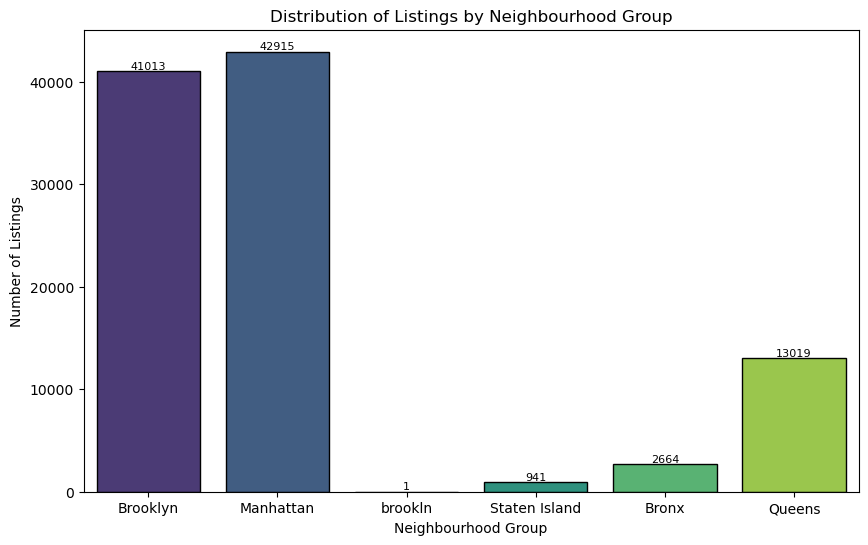

In [8]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='neighbourhood_group', data=df, palette='viridis', edgecolor='black')
plt.title('Distribution of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')

# Annotate each bar with its value
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}',
             ha='center', va='bottom', fontsize=8, color='black')

plt.show()